# Exercise 3
## Lillian Mueller and Regina Hong 
Investigating linear regression 

In [1]:
from sklearn import linear_model
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# import wiki pass/fail data 
wiki_data = pd.DataFrame()
with open('wiki_data.txt', 'r') as f: 
    for line in f:
        # split line by commas and remove newline character
        entry = line.replace('\n', '').split(',')
        # convert items into floats
        wiki_data[entry[0]] = list(map(float, entry[1:]))
    f.close()

wiki_data.sample(5)

,Hours (xk),Pass (yk)
15,4.25,1.0
16,4.50,1.0
18,5.00,1.0
2,1.00,0.0
3,1.25,0.0


In [7]:
wiki_hours

array([[0.5 ],
       [0.75],
       [1.  ],
       [1.25],
       [1.5 ],
       [1.75],
       [1.75],
       [2.  ],
       [2.25],
       [2.5 ],
       [2.75],
       [3.  ],
       [3.25],
       [3.5 ],
       [4.  ],
       [4.25],
       [4.5 ],
       [4.75],
       [5.  ],
       [5.5 ]])

In [9]:
# reshape hours array to fit (numSamples, nFeatures)
wiki_hours = np.array(wiki_data['Hours (xk)']).reshape(len(wiki_data.index), 1)

# fit logistic regression to wiki data 
logR = linear_model.LogisticRegression(penalty=None).fit(
    wiki_hours, 
    wiki_data['Pass (yk)']
    )

# find coefficients 
B0 = logR.intercept_[0]
B1 = logR.coef_[0][0]
print('B0: ', B0)
print('B1: ', B1)


mu = -B0/B1
s = 1/B1
print('mu: ', mu)
print('s: ', s)

B0:  -4.077717641176838
B1:  1.504645217662829
mu:  2.7100858018282685
s:  0.6646084992403084


In [10]:
# get estimated probabilities
estProbs = pd.DataFrame()
# create array of study hours 
estProbs['Hours'] = list(range(1, 3)) + [mu] + list(range(3, 6))

# log-odds (t)
estProbs['t'] = B0 + estProbs['Hours']*B1

# Odds (e^t)
estProbs['e^t'] = np.exp(estProbs['t'])

# Probability
estProbs['p'] = 1/(1+np.exp(-estProbs['t']))

# Probability Score using model
estProbs['Prediction'] = [row[-1] for row in logR.predict_proba(np.array(estProbs['Hours']).reshape(6, 1))]

estProbs

,Hours,t,e^t,p,Prediction
0,1.000000,-2.573072,0.076301,0.070892,0.070892
1,2.000000,-1.068427,0.343548,0.255702,0.255702
2,2.710086,0.000000,1.000000,0.500000,0.500000
3,3.000000,0.436218,1.546846,0.607357,0.607357
4,4.000000,1.940863,6.964761,0.874447,0.874447
5,5.000000,3.445508,31.359224,0.969097,0.969097


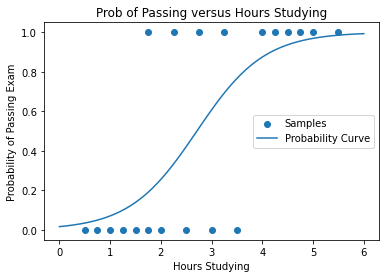

In [11]:
# plot graph 
plt.clf()

# plot wiki data
plt.scatter(wiki_data['Hours (xk)'], wiki_data['Pass (yk)'])

# plot probability curve 
hrs = np.linspace(0, 6, 100)
# only use probability of passing
p = [row[-1] for row in logR.predict_proba(np.array(hrs).reshape(100, 1))]
plt.plot(hrs, p)

# label plot 
plt.title("Prob of Passing versus Hours Studying")
plt.xlabel("Hours Studying")
plt.ylabel('Probability of Passing Exam')
plt.legend(['Samples', 'Probability Curve'], loc="center right")

plt.savefig("passingExams.png")
plt.show()